## Modelo

Representación abstracta, conceptual, gráfica o visual

Regresión lineal es un modelo matemático

- Es un modelo sencillo
- Fundamental para las áreas de estadística y de ML

Error (e) : La diferencia entre el valor real y el valor estimado por nuestro modelo

Error 1: $e_1 = \hat{y_1} - y_1$

$\hat{y} = w_0 + w_1 x$

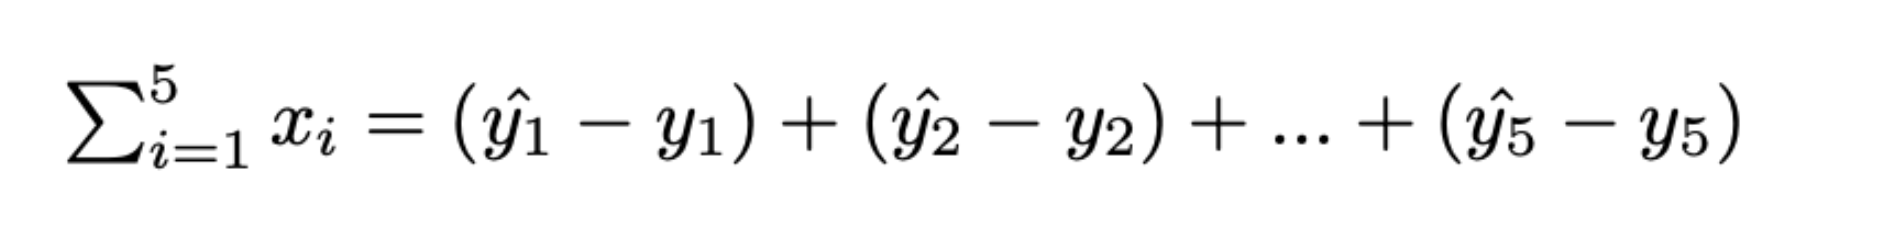

Mi modelo de regresión busca la recta que tenga el menor error posible

Los errores pueden ser positivos o negativos. Para descartar la mutua cancelación, hay que pasarlos a todos positivos.
Eso se puede hacer con el módulo o el cuadrado.

MAE (mean absolute error): Error absoluto medio (es un cálculo que se basa en la fórmula de la desviación media)
MSE (mean squared error): Error cuadrático medio (es un cálculo que se basa en la fórmula de la varianza)
RMSE (root mean squared error): Raíz cuadrada de MSE (es un cálculo que se basa en la fórmula de la desviación media)

La distribución del error cuadrático medio sigue una función cuadrática, con lo cual tiene un solo mínimo (calculable mediante la derivada)

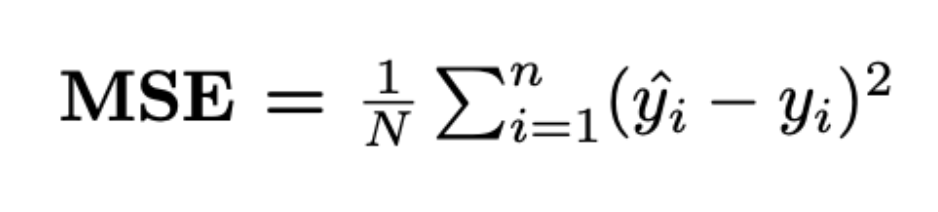

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/advertising.csv')

In [3]:
df.drop(columns=['Unnamed: 0','City_size'],inplace=True)

In [4]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


### Regresión lineal (múltiple)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
model = LinearRegression() # creo la instancia de mi modelo de regresión

In [15]:
# Separo entre features y variable objetivo
X = df.drop(columns=['Sales'])  # Elimino la columna 'Sales' porque es la variable dependiente.
y = df['Sales']

In [16]:
# Entreno a mi modelo
model.fit(X,y)

LinearRegression()

In [17]:
# Predicción de resultados
y_pred = model.predict(X) # predictions y sombrero (la recta de regresión o el hiperplano)

In [18]:
# Evaluación del error
print("MSE:",mean_squared_error(y,y_pred))

MSE: 2.784126314510936


In [21]:
print("MSE:",mean_absolute_error(y,y_pred))

MSE: 1.2520112296870685


In [20]:
print("R2:",r2_score(y,y_pred))

R2: 0.8972106381789522


### Coeficientes:
Pendientes

In [11]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

Ordenada al origen

In [12]:
model.intercept_

2.938889369459412

In [23]:
from statsmodels import regression

model = regression.linear_model.OLS(y, X).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):                   2.43e-171
Time:                        20:32:54   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------